In [23]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [24]:


def walmart_search_by_keyword(keyword):
    url = "https://axesso-walmart-data-service.p.rapidapi.com/wlm/walmart-search-by-keyword"

    querystring = {
        "keyword": keyword,
        "page": "1",
        "sortBy": "best_match"
    }

    headers = {

        "X-RapidAPI-Key":   "Api_key"  ,
        "X-RapidAPI-Host": "axesso-walmart-data-service.p.rapidapi.com"
    }

    response = requests.get(url, headers=headers, params=querystring)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None


In [25]:

############################only call this cell one per use##########################################
############################   50 call a month limit       ##########################################
data = walmart_search_by_keyword("Clothing")

#extracted_data = [extract_info(item) for item in data['item']['props']['pageProps']['initialData']['searchResult']['itemStacks'][0]['items']]
#display the first line price
#data['item']['props']['pageProps']['initialData']['searchResult']['itemStacks'][0]['items'][0]['priceInfo']['linePrice']



In [26]:

#in case the original data got all messed up we have data2
data2 = data


item_stacks = data['item']['props']['pageProps']['initialData']['searchResult']['itemStacks']
line_prices = []

names = []
avg_ratings = []
num_of_reviews = []
prices = []
item_data = {}
item_ids = []
item_avgs = []
item_num_of_reviews =[]
seller_names = []
availabilities = []

for stack in item_stacks:
    items = stack['items']
    for item in items:
        #had to bring exception (try catch)since some datas are empty
        try:
            #item id
            item_id = item['usItemId']
            item_ids.append(item_id)  # Add item_id to the list
            item_data['id'] = item_ids  # Store the list in item_data

            #seller names
            seller_name = item["sellerName"]
            seller_names.append(seller_name)
            item_data["seller_name"] = seller_names

            #price
            price = item["price"]
            prices.append(price)
            item_data['item_price'] = prices



            #line prices
            line_price = item['priceInfo']['linePrice']
            line_prices.append(line_price)
            item_data['Item_line_price'] = line_prices




            #line price display
            line_price_display = item['priceInfo']['linePriceDisplay']


            #availibily
            availabilities.append(not item['isOutOfStock'])
            item_data['availability'] = availabilities

            #average rating and total number of reviews
            avg_rating = item['rating']['averageRating']  # Corrected variable name
            item_avgs.append(avg_rating)
            item_data['avg_rating'] = item_avgs
            num_of_reviews = item['rating']['numberOfReviews']
            item_num_of_reviews.append(num_of_reviews)
            item_data['reviews'] = item_num_of_reviews
            #name of the item
            name = item['name']
            names.append(name)
            item_data['item_name'] = names

        #creating exception for cases with no values
        #in a way I am also eliminating these values from entering the dataframe
        except KeyError:
            print("None")


None
None
None
None
None


In [27]:

df = pd.DataFrame(item_data)
# Save the DataFrame to a CSV file
df.to_csv('item_data.csv', index="False")
df = df.set_index("id")


In [28]:
df

,seller_name,item_price,Item_line_price,availability,avg_rating,reviews,item_name
id,,,,,,,
1298698362,Walmart.com,11,$11.97,True,4,164,Real Littles Collectible Micro Sanrio Hello Ki...
1316084669,FSLK,15,$15.99,True,4,1818,Fantaslook Sweatshirts for Women Crewneck Casu...
469570506,Neleus,19,$19.54,True,0,0,NELEUS Womens Compression Base Layer Dry Fit T...
671683970,Crazy Dog Tshirts,18,$18.99,True,0,0,Womens Fitness Tank Hide And Seek Champion Tan...
3567947015,Walmart.com,13,$13.00,True,4,17,Time and Tru Women's Side Button Crew Neck Swe...
460997580,Walmart.com,26,$26.98,True,4,101,Signature by Levi Strauss & Co. Women's Simply...
465429231,Gerber Childrenswear,15,$15.96,True,4,16,Modern Moments by Gerber Baby and Toddler Boy ...
1139908677,Walmart.com,24,$24.99,True,4,19,Terra & Sky Women's Plus Size Quarter Snap Fau...
558392374,Walmart.com,10,$10.00,True,4,31,Modern Moments by Gerber Baby and Toddler Girl...


In [29]:
data2

{'responseStatus': 'PRODUCT_FOUND_RESPONSE',
 'responseMessage': 'Product successfully found!',
 'sortStrategy': 'best_match',
 'domainCode': 'com',
 'keyword': 'Clothing',
 'item': {'assetPrefix': 'https://i5.walmartimages.com/dfw/63fd9f59-397c/135dd224-4517-49f9-9614-fc46d13dee3a/v2/en-US',
  'dynamicIds': ['613480',
   '554651',
   '484962',
   '161874',
   '966165',
   '763357',
   '823157',
   '350610',
   '714438',
   '533161',
   '57289',
   '305261',
   '986809',
   '721073'],
  'query': {'query': 'Clothing', 'sort': 'best_match', 'page': '1'},
  'appGip': True,
  'buildId': 'production_20231113T233804906Z-en-US',
  'locale': 'en',
  'props': {'pageProps': {'initialData': {'searchResult': {'title': 'Results for "Clothing"',
      'aggregatedCount': 459413,
      'debug': {'sisUrl': 'http://preso-usgm-wcnp.prod.walmart.com/v1/search?query=Clothing&facet=&stores=5867&cat_id=&sort=best_match&page=1&min_price=&max_price=&spelling=true&ptss=&trsp=&isMoreOptionsTileEnabled=true&autoO

Text(0.5, 1.0, 'Corrilation between price and number of reviews')

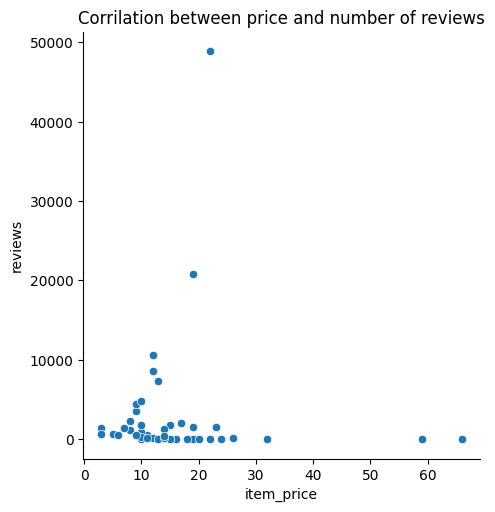

In [30]:
## Charts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(data=df, x="item_price", y="reviews")
plt.title("Corrilation between price and number of reviews")

## there doesn't seem to be any corrilation between the price of an item and the number of reviews that are left on an item


Text(0.5, 1.0, 'Types of Sellers')

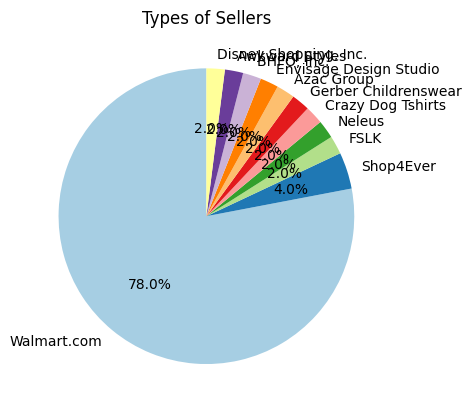

In [31]:
import matplotlib.pyplot as plt
SellerName_count = df['seller_name'].value_counts()
plt.pie(SellerName_count, labels=SellerName_count.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Types of Sellers')

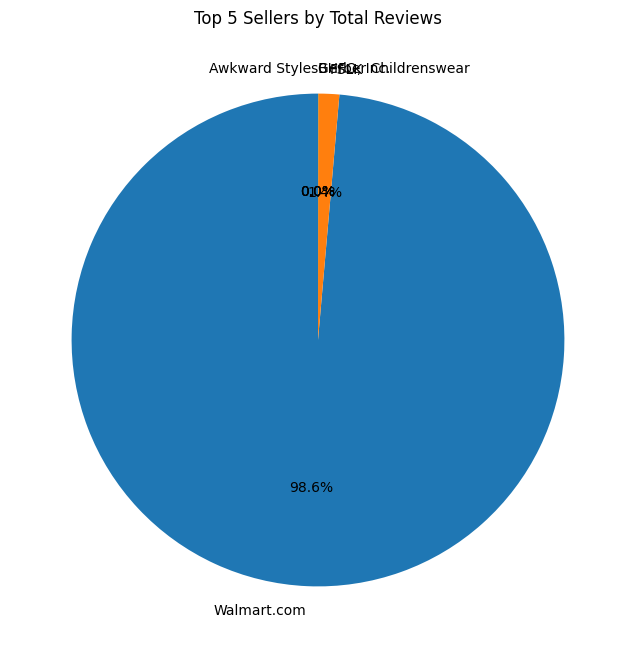

In [32]:
reviews_per_seller = df.groupby('seller_name')['reviews'].sum()

# Sorting the sellers by total reviews and selecting the top 5 sellers
top_5_sellers = reviews_per_seller.nlargest(5)

# Plotting a pie chart for the top 5 sellers
plt.figure(figsize=(10, 8))
plt.pie(top_5_sellers, labels=top_5_sellers.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Sellers by Total Reviews')
plt.show()

Text(0.5, 1.0, 'Average Prices Based on the Seller')

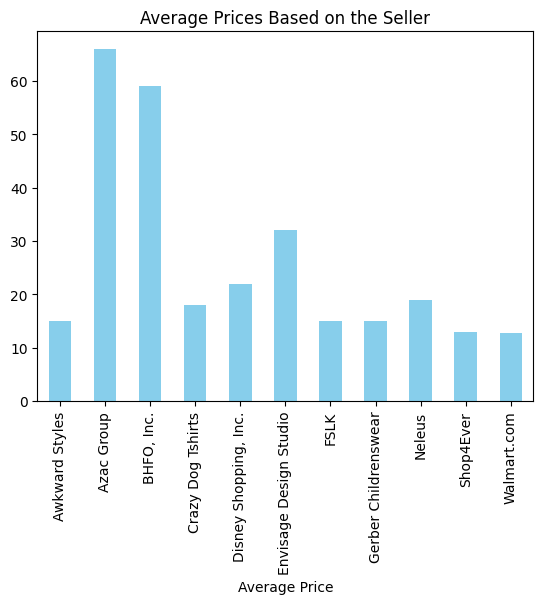

In [33]:
average_prices = df.groupby('seller_name')['item_price'].mean()
average_prices.plot(kind='bar', color='skyblue')
plt.xlabel('Seller Name')
plt.xlabel('Average Price')
plt.title('Average Prices Based on the Seller')


Text(0.5, 1.0, 'Average Prices Based on the Seller')

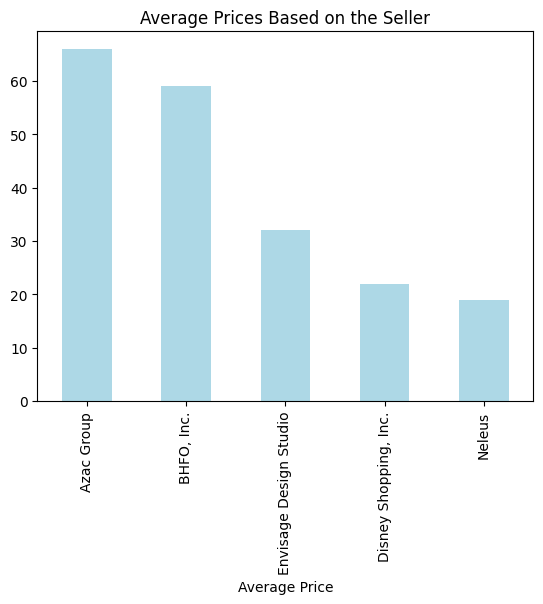

In [34]:
## This is the same as the chart ablove but it is only showing the top 5 price averages
average_prices = df.groupby('seller_name')['item_price'].mean()
top_5_avg_prices = average_prices.sort_values(ascending=False).head(5)
top_5_avg_prices.plot(kind='bar', color='lightblue')
plt.xlabel('Seller Name')
plt.xlabel('Average Price')
plt.title('Average Prices Based on the Seller')

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

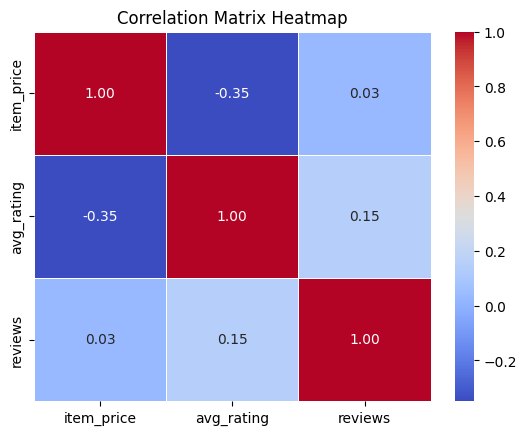

In [35]:
# Developed a correlation matrix no including availability because that that data type is boolean which throws off our findings
selected_columns = ['item_price', 'avg_rating', 'reviews']
subset_df = df[selected_columns]
cor_matrix = subset_df.corr()
sns.heatmap(cor_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = .5)
plt.title('Correlation Matrix Heatmap')


Text(0.5, 1.0, 'Distribution of Prices for Top 3 Sellers')

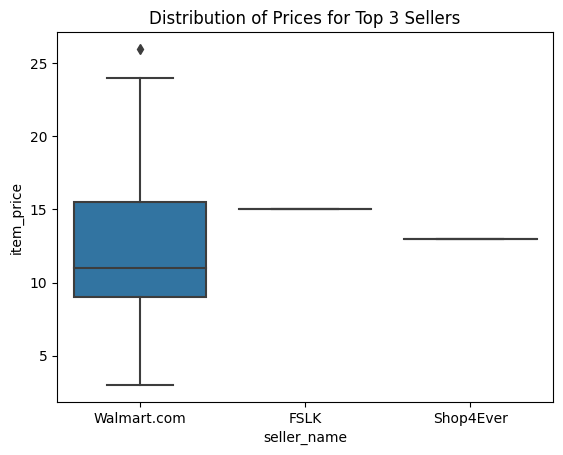

In [36]:
# Created a box plot to represent the top 3 sellers
top_sellers = df['seller_name'].value_counts().nlargest(3).index
df_top_sellers = df[df['seller_name'].isin(top_sellers)]
sns.boxplot(x='seller_name', y='item_price', data = df_top_sellers)
plt.title('Distribution of Prices for Top 3 Sellers')
